In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:22pt;}
div.text_cell_render.rendered_html{font-size:18pt;}
div.text_cell_render ul li{font-size:22pt; line-height:30px;}
div.output {font-size:22pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:22pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:22pt;padding:5px;}
table.dataframe{font-size:22px;}
</style>
"""))

# 1 tensorflow v2.xx에서 v1사용하기

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() # tensorflow v2 비활성화하고 v1 활성화
import numpy as np
import pandas as pd

Instructions for updating:
non-resource variables are not supported in the long term


## Tensorflow
- 데이터 흐름 그래프(tensor 객체의 흐름)을 사용하는 수치 계산 라이브러리
- 그래프는 node(연산)와 edge로 구성
- sess = tf.Session()을 이용해서 실행 환경
- sess.run()을 통해서 실행결과를 확인

In [3]:
# 1단계 : tensor(상수) 정의
node1 = tf.constant('Hello, Tensorflow')
# 2단계 : 세션(연산을 실행하는 환경) 생성
sess = tf.Session()
# 3단계 : 실제 실행 및 출력
print(sess.run(node1))
print(sess.run(node1).decode())

b'Hello, Tensorflow'
Hello, Tensorflow


In [4]:
# 간단한 연산 tensor 그래프
# 1. 그래프 정의
node1 = tf.constant(10, dtype=tf.float16)
node2 = tf.constant(20, dtype=tf.float16)
node3 = tf.add(node1,node2)
# 2. 세션 생성
sess = tf.Session()
# 3. 세션 실행 & 결과
print(sess.run([node1,node2,node3]))

[10.0, 20.0, 30.0]


In [5]:
# 타입변경
import numpy as np
node1 = tf.constant(np.array([1,2,3]), dtype=tf.int16)
node2 = tf.cast(node1, dtype=tf.float32)
sess = tf.Session()
print(sess.run([node1,node2]))

[array([1, 2, 3], dtype=int16), array([1., 2., 3.], dtype=float32)]


In [6]:
# 평균값 계산 : tf.reduce_mean()
data = np.array([1.,2.,3.,4.])
m = tf.reduce_mean(data)
sess = tf.Session()
print(sess.run(m))

2.5


In [7]:
# tf.random_normal([size]) : 평균이 0이고 표준편차가 1인 난수 size개 발생 
w = tf.random_normal([1])
sess = tf.Session()
sess.run(w)

array([0.1811632], dtype=float32)

In [8]:
# 변수 노드
w = tf.Variable(tf.random_normal([1]))
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # 변수 초기화
sess.run(w)

array([2.3038802], dtype=float32)

# 2 Tensorflow v1을 이용한 회귀분석 구현
## 2.1 독립변수 x가 1개, 타겟(종속)변수 y가 1개

In [9]:
# tensor 그래프 정의
# 데이터셋 확보
x = np.array([1,2,3])
y = np.array([2,3,4])
# weight와 bias
w = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')
# Hat, Hypothesis : 결과는 numpy 배열
H = w * x + b
# cost function (손실함수 : mse)
cost = tf.reduce_mean(tf.square(H-y))
'''
학습목적 : cost가 취소되는 w,b를 찾는것
cost함수는 2차함수이므로 곡선 그래프, 곡선위 미분값이 0이 되는 방향
(경사강하법GradientDescent)
'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
# 세션 생성
sess = tf.Session()
# w, b 초기화
sess.run(tf.global_variables_initializer())
# 6000번 학습 (v2에서의 fit함수)
for step in range(6001):
    _, cost_val, w_val, b_val = sess.run([train, cost, w, b])
    if step%300==0:
        print('{}번째 cost:{}, w:{}, b:{}'.format(step, cost_val, w_val, b_val))

0번째 cost:19.007795333862305, w:[-0.28506052], b:[-0.1623193]
300번째 cost:0.008510745130479336, w:[1.1068892], b:[0.75701547]
600번째 cost:0.0020082031842321157, w:[1.0519222], b:[0.8819683]
900번째 cost:0.00047385224024765193, w:[1.0252216], b:[0.94266546]
1200번째 cost:0.00011180853471159935, w:[1.0122515], b:[0.97214967]
1500번째 cost:2.6382484065834433e-05, w:[1.0059513], b:[0.9864713]
1800번째 cost:6.225579909369117e-06, w:[1.002891], b:[0.9934283]
2100번째 cost:1.4698158565806807e-06, w:[1.0014048], b:[0.9968068]
2400번째 cost:3.474276581982849e-07, w:[1.0006831], b:[0.9984476]
2700번째 cost:8.23147843220795e-08, w:[1.0003325], b:[0.99924433]
3000번째 cost:1.960237661080555e-08, w:[1.0001625], b:[0.99963135]
3300번째 cost:4.678113896261493e-09, w:[1.0000792], b:[0.9998198]
3600번째 cost:1.150207595834729e-09, w:[1.000039], b:[0.9999106]
3900번째 cost:2.664203579971769e-10, w:[1.0000191], b:[0.9999571]
4200번째 cost:8.08455524747842e-11, w:[1.0000106], b:[0.9999766]
4500번째 cost:5.328478283606053e-11, w:[1.00

In [10]:
# 최종적으로 나온 회귀식 H = W*x + b
w_,b_ = sess.run([w,b])

In [11]:
w_,b_

(array([1.0000087], dtype=float32), array([0.9999811], dtype=float32))

In [12]:
def predict(x):
    return w_[0] * x + b_[0]

In [13]:
predict(5)

6.000024616718292

## 2.2 predict을 위한 placeholder 이용
- placeholder : 외부에서 데이터를 입력받을 수 있는 노드

In [14]:
x = tf.placeholder(dtype=tf.float32)
H = 1*x + 1
sess = tf.Session()
sess.run([x,H], feed_dict={x : np.array([40,50])})

[array([40., 50.], dtype=float32), array([41., 51.], dtype=float32)]

In [15]:
# tensor 그래프 정의
# 데이터셋 확보
x_data = np.array([1,2,3])
y_data = np.array([2,3,4])
# placeholder 설정(x,y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# weight와 bias
w = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')
# Hat, Hypothesis : 결과는 numpy 배열
H = w * x + b
# cost function (손실함수 : mse)
cost = tf.reduce_mean(tf.square(H-y))
'''
학습목적 : cost가 취소되는 w,b를 찾는것
cost함수는 2차함수이므로 곡선 그래프, 곡선위 미분값이 0이 되는 방향
(경사강하법GradientDescent)
'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
# 세션 생성
sess = tf.Session()
# w, b 초기화
sess.run(tf.global_variables_initializer())
# 6000번 학습 (v2에서의 fit함수)
for step in range(6001):
    _, cost_val, w_val, b_val = sess.run([train, cost, w, b],feed_dict={x:x_data,
                                                                        y:y_data})
    if step%300==0:
        print('{}번째 cost:{}, w:{}, b:{}'.format(step, cost_val, w_val, b_val))

0번째 cost:30.702062606811523, w:[-0.14230333], b:[-1.561659]
300번째 cost:0.10124466568231583, w:[1.3686692], b:[0.16192861]
600번째 cost:0.023889677599072456, w:[1.1790835], b:[0.5929011]
900번째 cost:0.005636984948068857, w:[1.086991], b:[0.8022491]
1200번째 cost:0.0013301061699166894, w:[1.0422567], b:[0.903941]
1500번째 cost:0.00031385759939439595, w:[1.0205268], b:[0.95333827]
1800번째 cost:7.405500946333632e-05, w:[1.0099708], b:[0.97733396]
2100번째 cost:1.747478927427437e-05, w:[1.0048435], b:[0.9889897]
2400번째 cost:4.1237658479076345e-06, w:[1.0023528], b:[0.9946514]
2700번째 cost:9.736428410178632e-07, w:[1.0011435], b:[0.9974012]
3000번째 cost:2.301396051507254e-07, w:[1.0005561], b:[0.9987365]
3300번째 cost:5.455492058104028e-08, w:[1.0002706], b:[0.9993848]
3600번째 cost:1.300344365517958e-08, w:[1.0001318], b:[0.9996998]
3900번째 cost:3.111400248556606e-09, w:[1.0000648], b:[0.99985313]
4200번째 cost:7.488362707697149e-10, w:[1.0000316], b:[0.9999279]
4500번째 cost:1.8813750557455933e-10, w:[1.000016

In [16]:
# 예측하기
sess.run(H, feed_dict={x:5})

array([6.0000243], dtype=float32)

## 2.3 scale이 다른 데이터들의 회귀분석 구현(scale 조정x)

In [17]:
x_data = np.array([1, 2 , 5, 8, 10])
y_data = np.array([5, 15, 68, 80, 95])
# placeholder 설정
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# weight & bias
w = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))
# Hypothesis
H = w*x + b
# cost (손실함수)
cost = tf.reduce_mean(tf.square(H-y))
# 경사강하법
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(cost)
# Session & 변수초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 6001):
    _, cost_val = sess.run([train, cost], feed_dict={x:x_data,
                                                     y:y_data})
    if step%300==0:
        print("{}/6000번째 cost:{}".format(step+1, cost_val))

301/6000번째 cost:79.16595458984375
601/6000번째 cost:79.15801239013672
901/6000번째 cost:79.1524429321289
1201/6000번째 cost:79.14854431152344
1501/6000번째 cost:79.14579010009766
1801/6000번째 cost:79.14390563964844
2101/6000번째 cost:79.14257049560547
2401/6000번째 cost:79.14161682128906
2701/6000번째 cost:79.14096069335938
3001/6000번째 cost:79.14051055908203
3301/6000번째 cost:79.14021301269531
3601/6000번째 cost:79.13997650146484
3901/6000번째 cost:79.13981628417969
4201/6000번째 cost:79.13971710205078
4501/6000번째 cost:79.13963317871094
4801/6000번째 cost:79.13958740234375
5101/6000번째 cost:79.1395492553711
5401/6000번째 cost:79.13949584960938
5701/6000번째 cost:79.13948059082031
6001/6000번째 cost:79.13951110839844


## 2.4 scale이 다른 데이터들의 회귀분석 구현(scale 조정o)
### scale 조정 방법: 모든 데이터를 일정범위내로 조정
- normalization(정규화) : 모든 데이터를 0~1 사이로 조정
                      X - Xmin
   normalization = ───────────────
                     Xmax - Xmin
      * 위의 식보다 라이브러리 추천(sklearn.preprocessing.MinMaxScaler) 
- standardization(표준화) : 데이터의 평균을 0, 표준편차를 1로 조정
                        X - Xmean
   standardization = ───────────────
                      Xstd(표준편차)
      * 위의 식보다 라이브러리 추천(sklearn.preprocessing.StandardScaler)                

In [18]:
# 라이브러리 쓰지 않고 정규화
x_data = np.array([1, 2, 5, 8, 10])
y_data = np.array([5, 15, 68, 80, 95])
# x_data.min(),x_data.max(),x_data.mean(),x_data.std()
norm_scaled_x_data = (x_data - x_data.min()) / (x_data.max() - x_data.min())
norm_scaled_y_data = (y_data - y_data.min()) / (y_data.max() - y_data.min())
norm_scaled_y_data

array([0.        , 0.11111111, 0.7       , 0.83333333, 1.        ])

In [19]:
# 라이브러리를 사용하여 정규화
x_data = np.array([1, 2, 5, 8, 10]).reshape(-1,1)
y_data = np.array([5, 15, 68, 80, 95]).reshape(-1,1)
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler() # 독립변수 x를 정규화 시킬 객체
scaler_x.fit(x_data)
norm_scaled_x_data = scaler_x.transform(x_data)
scaler_y = MinMaxScaler() # 종속(타겟)변수 y를 정규화시킬 객체 
norm_scaled_y_data = scaler_y.fit_transform(y_data)
norm_scaled_y_data 

array([[0.        ],
       [0.11111111],
       [0.7       ],
       [0.83333333],
       [1.        ]])

In [20]:
# 라이브러리 쓰지 않고 표준화
x_data = np.array([1, 2, 5, 8, 10])
y_data = np.array([5, 15, 68, 80, 95])
stan_scaled_x_data = (x_data - x_data.mean()) / x_data.std()
stan_scaled_y_data = (y_data - y_data.mean()) / y_data.std()
np.column_stack([x_data, norm_scaled_x_data, stan_scaled_x_data])

array([[ 1.        ,  0.        , -1.22474487],
       [ 2.        ,  0.11111111, -0.93313895],
       [ 5.        ,  0.44444444, -0.05832118],
       [ 8.        ,  0.77777778,  0.81649658],
       [10.        ,  1.        ,  1.39970842]])

In [21]:
np.column_stack([y_data, norm_scaled_y_data, stan_scaled_y_data])

array([[ 5.        ,  0.        , -1.32373476],
       [15.        ,  0.11111111, -1.04563922],
       [68.        ,  0.7       ,  0.42826713],
       [80.        ,  0.83333333,  0.76198177],
       [95.        ,  1.        ,  1.17912508]])

In [22]:
# 라이브러리를 사용하여 표준화
x_data = np.array([1, 2, 5, 8, 10]).reshape(-1,1)
y_data = np.array([5, 15, 68, 80, 95]).reshape(-1,1)

from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
stan_scaler_x_data = scaler_x.fit_transform(x_data)
scaler_y = StandardScaler()
stan_scaler_y_data = scaler_y.fit_transform(y_data)

In [23]:
np.column_stack([y_data, norm_scaled_y_data, stan_scaled_y_data])

array([[ 5.        ,  0.        , -1.32373476],
       [15.        ,  0.11111111, -1.04563922],
       [68.        ,  0.7       ,  0.42826713],
       [80.        ,  0.83333333,  0.76198177],
       [95.        ,  1.        ,  1.17912508]])

In [24]:
# 스케일 조정된 데이터를 다시 복구 : invers_transform() 이용
scaler_y.inverse_transform(stan_scaler_y_data)

array([[ 5.],
       [15.],
       [68.],
       [80.],
       [95.]])

In [25]:
x_data = np.array([1, 2 , 5, 8, 10])
y_data = np.array([5, 15, 68, 80, 95])
# placeholder 설정
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# weight & bias
w = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))
# Hypothesis
H = w*x + b
# cost (손실함수)
cost = tf.reduce_mean(tf.square(H-y))
# 경사강하법
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(cost)
# Session & 변수초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 6001):
    _, cost_val = sess.run([train, cost], feed_dict={x:norm_scaled_x_data,
                                                     y:norm_scaled_y_data})
    if step%300==0:
        print("{}/6000번째 cost:{}".format(step, cost_val))

300/6000번째 cost:0.2341957539319992
600/6000번째 cost:0.15814341604709625
900/6000번째 cost:0.12832576036453247
1200/6000번째 cost:0.1105196624994278
1500/6000번째 cost:0.09685300290584564
1800/6000번째 cost:0.08537549525499344
2100/6000번째 cost:0.07548613846302032
2400/6000번째 cost:0.06690722703933716
2700/6000번째 cost:0.059452157467603683
3000/6000번째 cost:0.0529705174267292
3300/6000번째 cost:0.04733471944928169
3600/6000번째 cost:0.042434170842170715
3900/6000번째 cost:0.03817296773195267
4200/6000번째 cost:0.03446764498949051
4500/6000번째 cost:0.031245719641447067
4800/6000번째 cost:0.02844405733048916
5100/6000번째 cost:0.02600795030593872
5400/6000번째 cost:0.02388964407145977
5700/6000번째 cost:0.02204769104719162
6000/6000번째 cost:0.020446043461561203


## 2.5 독립변수 x가 3개, 타겟(종속)변수 y가 1개
- 교안 28p

In [59]:
# data set
x_data = np.array([[73, 80, 75],   # 학습시에는 X에 5행3열, 예측시 ?행3열
                   [93, 88, 93],
                   [89, 91, 90],
                   [96, 98, 100],
                   [73, 66, 70]])
y_data = np.array([[152],  # 학습시에는 y에 5행1열, 예측시 ?행1열
                   [185],
                   [180],
                   [196],
                   [142]])
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# sess = tf.Session()
# sess.run(X, feed_dict={X:x_data[0:1, ]})
# weight & bias (weight는 3개, bias는 1개)
W = tf.Variable(tf.random.normal([3, 1]))
b = tf.Variable(tf.random_normal([1]))
# Hypothesis
#H = X  @ W + b # 행렬곱
H = tf.matmul(X, W) + b
# cost : mse loss function 사용
cost = tf.reduce_mean(tf.square(H - y))
# optimizer & train
train = tf.train.GradientDescentOptimizer(learning_rate=2e-5).minimize(cost)
# session 생성과 variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 40001):
    _, cost_val = sess.run([train, cost], feed_dict={X: x_data,
                                                    y:y_data})
    if step%5000 == 1:
        print("{}번째 cost : {}".format(step, cost_val))
print('최종 cost : {}'.format(cost_val))

1번째 cost : 41388.3671875
5001번째 cost : 0.1837792694568634
10001번째 cost : 0.154058575630188
15001번째 cost : 0.13779886066913605
20001번째 cost : 0.12779679894447327
25001번째 cost : 0.12162623554468155
30001번째 cost : 0.11782868951559067
35001번째 cost : 0.11549295485019684
최종 cost : 0.11404316127300262


In [56]:
# 예측
input_data = np.array([[73,80,77],
                      [73,80,72]])
sess.run(H, feed_dict={X:input_data})

array([[152.61531],
       [150.47444]], dtype=float32)

In [57]:
input_data = np.array([[73,80,77]])
sess.run(H, feed_dict={X:input_data})

array([[152.61531]], dtype=float32)

In [69]:
# 스케일 조정 후 학습하고 예측하기
from sklearn.preprocessing import StandardScaler
x_data = np.array([[73, 80, 75],   # 학습시에는 X에 5행3열, 예측시 ?행3열
                   [93, 88, 93],
                   [89, 91, 90],
                   [96, 98, 100],
                   [73, 66, 70]])
y_data = np.array([[152],[185],[180],[196],[142]])
scaled_x = StandardScaler()
scaled_y = StandardScaler()
scaled_x_data = scaled_x.fit_transform(x_data)
scaled_y_data = scaled_y.fit_transform(y_data)
np.column_stack([scaled_x_data,scaled_y_data])

array([[-1.19344226, -0.42020085, -0.93897274, -0.92622337],
       [ 0.82934123,  0.31058324,  0.65550927,  0.68248038],
       [ 0.42478453,  0.58462728,  0.38976227,  0.43873739],
       [ 1.13275875,  1.22406336,  1.27558561,  1.21871496],
       [-1.19344226, -1.69907302, -1.38188441, -1.41370936]])

In [70]:
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# sess = tf.Session()
# sess.run(X, feed_dict={X:x_data[0:1, ]})
# weight & bias (weight는 3개, bias는 1개)
W = tf.Variable(tf.random.normal([3, 1]))
b = tf.Variable(tf.random_normal([1]))
# Hypothesis
#H = X  @ W + b # 행렬곱
H = tf.matmul(X, W) + b
# cost : mse loss function 사용
cost = tf.reduce_mean(tf.square(H - y))
# optimizer & train
train = tf.train.GradientDescentOptimizer(learning_rate=0.02).minimize(cost)
# session 생성과 variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 20000):
    _, cost_val = sess.run([train, cost], feed_dict={X:scaled_x_data,
                                                    y:scaled_y_data})
    if step%2000 == 1:
        print("{}번째 cost : {}".format(step, cost_val))
print('최종 cost : {}'.format(cost_val))

1번째 cost : 0.34846991300582886
2001번째 cost : 0.001321131712757051
4001번째 cost : 0.0009959549643099308
6001번째 cost : 0.0007693060906603932
8001번째 cost : 0.0006113352719694376
10001번째 cost : 0.0005012297770008445
12001번째 cost : 0.0004244848678354174
14001번째 cost : 0.00037099330802448094
16001번째 cost : 0.00033370801247656345
18001번째 cost : 0.0003077194560319185
최종 cost : 0.00028961876523680985


In [76]:
# 예측하기
input_data = np.array([[73,80,77],
                      [73,80,72]])
hat=sess.run(H, feed_dict={X:scaler_x.transform(input_data)})
predict_data = scaler_y.inverse_transform(hat)
print(predict_data)

[[152.81317]
 [150.02216]]


In [84]:
# 예측
input_data = np.array([[73,80,77]])
hat=sess.run(H, feed_dict={X:scaler_x.transform(input_data)}) 
predict_data = scaler_y.inverse_transform(hat)
print(predict_data)

[[152.81317]]


# 3. Logistic regression == Binary classification
- 로지스틱 회귀분석 = 이진분류분석
- 기존의 회귀분석과 다른 처리가 필요(loss function, H)

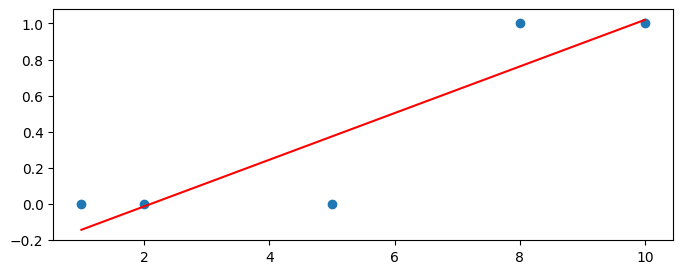

In [90]:
# 교안 35p
from scipy import stats
import matplotlib.pyplot as plt
plt.figure(figsize=(8,3))
x = np.array([1, 2, 5, 8, 10])
y = np.array([0, 0, 0, 1, 1]) # 실제값
lm = stats.linregress(x,y) # 기울기(weight, slope)와 절편(bias, intercept)
lm[0], lm[1] # W와 bias
H = lm[0] * x  + lm[1] # 예측값
plt.scatter(x,y)
plt.plot(x, H, 'r')
plt.show()

In [103]:
# 교안 46p
x_data = np.array([[10,0],
                   [8, 1],
                   [3, 3],
                   [2, 3],
                   [5, 1],
                   [2, 0],
                   [1, 0]])
y_data = np.array([[1],[1],[1],[1],[0],[0],[0]])
# X,y
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# 독립(입력)변수 2개->타겟(출력)변수 1개인 weight & bias
W = tf.Variable(tf.random_normal([2,1]))
b = tf.Variable(tf.random_normal([1]))
# Hypothesis
logits = tf.matmul(X, W) + b # X@W + b : 시그모이드 활성화 함수 직전
H = tf.sigmoid(logits)
# cost
# cost = tf.reduce_mean(tf.square(H-y))
# sigmoid 활성화함수를 입히면 위와 같은 cost 작아져 gradient 엄청 작아져
# 학습이 제대로 진행안됨 그래서 loss function을 cross entropy사용
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                              labels=y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.2).minimize(cost)
# session 생성 & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1,10001):
    _,cost_val = sess.run([train,cost], feed_dict={X:x_data,
                                                   y:y_data})
    if step%1000==1:
        print('{}번째 cost : {}'.format(step,cost_val))
print('최종 cost : ',cost_val)

1번째 cost : 1.5114240646362305
1001번째 cost : 0.1450420320034027
2001번째 cost : 0.10346711426973343
3001번째 cost : 0.07975264638662338
4001번째 cost : 0.06450045108795166
5001번째 cost : 0.05396440997719765
6001번째 cost : 0.04629607871174812
7001번째 cost : 0.04048684239387512
8001번째 cost : 0.035944756120443344
9001번째 cost : 0.03230194374918938
최종 cost :  0.029321458


In [108]:
# accuracy (정확도 : 얼마나 맞췄는지 %)
predict = tf.cast(H>=0.5, dtype=tf.float32)
# sess.run(predict, feed_dict={X:x_data})
correct = tf.equal(predict, y)
# sess.run(correct, feed_dict={X:x_data, y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print('모델의 정확도 :', sess.run(accuracy, feed_dict={X:x_data, y:y_data})*100,'%')

모델의 정확도 : 100.0 %


# 4. XOR 
- 교안 62

In [109]:
# data set
x_data = np.array([[0,0],
                   [0,1],
                   [1,0],
                   [1,1]])
y_data = np.array([[0],[1],[1],[0]])
# X & y
X = tf.placeholder(shape=[None,2], dtype=tf.float32)
y = tf.placeholder(shape=[None,1], dtype=tf.float32)
# 입력 2개 => 출력 1개인 W & b
W = tf.Variable(tf.random_normal([2,1]))
b = tf.Variable(tf.random_normal([1]))
# Hypothesis
logits = tf.matmul(X, W) + b # X@W + b : 시그모이드 활성화 함수 직전
H = tf.sigmoid(logits)
# cost
# cost = tf.reduce_mean(tf.square(H-y))
# sigmoid 활성화함수를 입히면 위와 같은 cost 작아져 gradient 엄청 작아져
# 학습이 제대로 진행안됨 그래서 loss function을 cross entropy사용
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                              labels=y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# session 생성 & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1,6001):
    _,cost_val = sess.run([train,cost], feed_dict={X:x_data,
                                                   y:y_data})
    if step%1000==1:
        print('{}번째 cost : {}'.format(step,cost_val))
print('최종 cost : ',cost_val)

1번째 cost : 0.8440722227096558
1001번째 cost : 0.7087575197219849
2001번째 cost : 0.6986716389656067
3001번째 cost : 0.6952022314071655
4001번째 cost : 0.693949818611145
5001번째 cost : 0.693474531173706
최종 cost :  0.69328547


In [110]:
# accuracy (정확도 : 얼마나 맞췄는지 %)
predict = tf.cast(H>=0.5, dtype=tf.float32)
# sess.run(predict, feed_dict={X:x_data})
correct = tf.equal(predict, y)
# sess.run(correct, feed_dict={X:x_data, y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print('모델의 정확도 :', sess.run(accuracy, feed_dict={X:x_data, y:y_data})*100,'%')

모델의 정확도 : 50.0 %


# Deep Learning : XOR
- X2 => 4 => 1

In [111]:
# data set
x_data = np.array([[0,0],
                   [0,1],
                   [1,0],
                   [1,1]])
y_data = np.array([[0],[1],[1],[0]])
# X & y
X = tf.placeholder(shape=[None,2], dtype=tf.float32)
y = tf.placeholder(shape=[None,1], dtype=tf.float32)
# layer1 : 입력2 -> 출력 4인 W & b
W1 = tf.Variable(tf.random_normal([2,4]))
b1 = tf.Variable(tf.random_normal([4]))
layer1 = tf.nn.relu(tf.matmul(X,W1) + b1)
# layer2 : 입력4 -> 출력 1인 W & b
W2 = tf.Variable(tf.random_normal([4,1]))
b2 = tf.Variable(tf.random_normal([1]))
# Hypothesis
logits = tf.matmul(layer1, W2) + b2
H = tf.sigmoid(logits)
# cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                              labels=y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# session 생성 & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1,6001):
    _,cost_val = sess.run([train,cost], feed_dict={X:x_data,
                                                   y:y_data})
    if step%1000==1:
        print('{}번째 cost : {}'.format(step,cost_val))
print('최종 cost : ',cost_val)

1번째 cost : 1.037645936012268
1001번째 cost : 0.4928729236125946
2001번째 cost : 0.40368252992630005
3001번째 cost : 0.3747628331184387
4001번째 cost : 0.36397576332092285
5001번째 cost : 0.3587397336959839
최종 cost :  0.35572863


In [112]:
# accuracy (정확도 : 얼마나 맞췄는지 %)
predict = tf.cast(H>=0.5, dtype=tf.float32)
# sess.run(predict, feed_dict={X:x_data})
correct = tf.equal(predict, y)
# sess.run(correct, feed_dict={X:x_data, y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print('모델의 정확도 :', sess.run(accuracy, feed_dict={X:x_data, y:y_data})*100,'%')

모델의 정확도 : 75.0 %


# layer층을 X2 => 10 => 20 => 10 => y1
                      입력층     hidden layers      출력층

In [114]:
# data set
x_data = np.array([[0,0],
                   [0,1],
                   [1,0],
                   [1,1]])
y_data = np.array([[0],[1],[1],[0]])

# X & y
X = tf.placeholder(shape=[None,2], dtype=tf.float32)
y = tf.placeholder(shape=[None,1], dtype=tf.float32)

# layer1 : 입력2 -> 출력 10인 W & b
W1 = tf.Variable(tf.random_normal([2,10]))
b1 = tf.Variable(tf.random_normal([10]))
layer1 = tf.nn.relu(tf.matmul(X,W1) + b1)

# layer2 : 입력10 -> 출력 20인 W & b
W2 = tf.Variable(tf.random_normal([10,20]))
b2 = tf.Variable(tf.random_normal([20]))
layer2 = tf.nn.relu(tf.matmul(layer1,W2) + b2)

# layer3 : 입력20 -> 출력 10인 W & b
W3 = tf.Variable(tf.random_normal([20,10]))
b3 = tf.Variable(tf.random_normal([10]))
layer3 = tf.nn.relu(tf.matmul(layer2,W3) + b3)

# layer4 : 입력10 -> 출력 1인 W & b
W4 = tf.Variable(tf.random_normal([10,1]))
b4 = tf.Variable(tf.random_normal([1]))
# Hypothesis
logits = tf.matmul(layer3, W4) + b4
H = tf.sigmoid(logits)
# cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                              labels=y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
# session 생성 & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1,301):
    _,cost_val = sess.run([train,cost], feed_dict={X:x_data,
                                                   y:y_data})
    if step%100==1:
        print('{}번째 cost : {}'.format(step,cost_val))
print('최종 cost : ',cost_val)

1번째 cost : 0.701202392578125
101번째 cost : 0.0018131914548575878
201번째 cost : 0.0008996933465823531
최종 cost :  0.00059931935


In [115]:
# accuracy (정확도 : 얼마나 맞췄는지 %)
predict = tf.cast(H>=0.5, dtype=tf.float32)
# sess.run(predict, feed_dict={X:x_data})
correct = tf.equal(predict, y)
# sess.run(correct, feed_dict={X:x_data, y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print('모델의 정확도 :', sess.run(accuracy, feed_dict={X:x_data, y:y_data})*100,'%')

모델의 정확도 : 100.0 %


In [116]:
# 예측
sess.run(H, feed_dict={X: np.array([[0,0]])})

array([[0.00098301]], dtype=float32)